In [1]:
import torch
import os
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

import datetime
date_string = str(datetime.date.today())
print(date_string)

dir_name = "./" + date_string + "_result/"
if not os.path.isdir(dir_name):
    os.mkdir(dir_name)
else:
    print(dir_name + "is exist")

print(dir_name)

True
NVIDIA GeForce GTX 1660
2023-08-15
./2023-08-15_result/


In [2]:
bin_w = 23
bin_h = 37
input_per_bin = 12
epochs = 100 #origin 10000
n_step = 4 #if single step, n_step = 1


print("now size = ",bin_w,bin_h)
print("n_step = ", n_step)


now size =  23 37
n_step =  4


In [3]:
#model initial
import numpy as np
import torch
import os
from collections import deque
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
import copy

seed = 777

def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
seed_torch(seed)

#training setting
input = 2**(input_per_bin+2)
l2 = 128
l3 = 128
action_space = 2**(input_per_bin+1)


model = torch.nn.Sequential(
    torch.nn.Linear(input, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3, action_space)
)
model = model
model2 = copy.deepcopy(model)
model2.load_state_dict(model.state_dict()) #B

loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.99
epsilon = 0.9
sync_freq = 1000  #每500次將eval model 複製到target model

shape = (2**(input_per_bin+1),2,) #shape of tree, as a tensor form, declare at below
losses = []
rewards = []
mem_size = 1000
batch_size = 64
replay = deque(maxlen=mem_size)

# Target network

try update

tensor([[ -1.,  -1., 600.,  ...,  -1.,  -1.,  -1.]])
 node 1 : 200 200,

 node 2 : 200 200, node 3 : 200 200,

 node 4 : 300 200, node 5 : 0 0, node 6 : 200 100, node 7 : 200 1000,

 node 8 : 600 400, node 9 : 300 600, node 12 : 400 100, node 13 : 200 200,

end tree


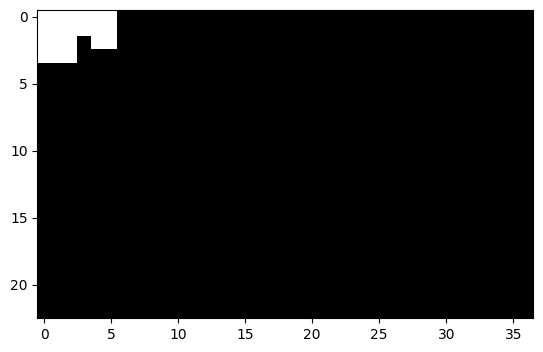

In [4]:
# import and function
import numpy as np
import torch

from IPython.display import clear_output
import random
from matplotlib import pylab as plt
import copy
# deploy slice with width and height at target node(never 0) in tree, modifi other space archibute
def deploy_slice(node,width,height):
  #deploy
  if node < 2**(input_per_bin-1):
    state1_[0,node*4] = state1_[0,node*2]
    state1_[0,node*4+1] = state1_[0,node*2+1] - height
    state1_[0,node*4+2] = state1_[0,node*2] -width
    state1_[0,node*4+3] = state1_[0,node*2+1] 
  state1_[0,node*2] = width
  state1_[0,node*2+1] = height
  #calcuate depoly position
  deploy_x = 0
  deploy_y = 0
  current_node = node
  while current_node != 1:
    parent = current_node//2
    LorR = current_node%2
    if LorR == 0: # left tree
      deploy_y += int(state1_[0,parent*2+1])
    else: # right tree
      deploy_x += int(state1_[0,parent*2])
    current_node = parent

  # update
  for check_node in range(1,2**(input_per_bin-1)-1):
    if state1_[0,check_node*2] != -1: # maybe leaf or internal node
      #check left and right, if both is not valid node, this is leaf
      if (state1_[0,check_node*4] == -1 and state1_[0,check_node*4+1] == -1 
        and state1_[0,check_node*4+2] == -1 and state1_[0,check_node*4+3] == -1):
        #find x y axis
        check_node_x = 0
        check_node_y = 0
        current_node = check_node
        while current_node != 1:
          parent = current_node//2
          LorR = current_node%2
          if LorR == 0: # left tree
            check_node_y += int(state1_[0,parent*2+1])
          else: # right tree
            check_node_x += int(state1_[0,parent*2])
          current_node = parent
        # update node size
        # tree node's upper area is covered by new node
        if deploy_x < check_node_x + state1_[0,check_node*2] and deploy_x + width > check_node_x and \
          deploy_y > check_node_y and check_node_y + state1_[0,check_node*2+1] > deploy_y:
          state1_[0,check_node*2+1] = deploy_y - check_node_y
          #print("upper")
        # tree node's right area is covered by new node
        if deploy_y < check_node_y + state1_[0,check_node*2+1] and deploy_y + height > check_node_y and \
          deploy_x > check_node_x and check_node_x + state1_[0,check_node*2] > deploy_x:
          state1_[0,check_node*2] = deploy_x - check_node_x
          #print("right")
        # tree node's lower area is exactly cover by new node
        if deploy_x == check_node_x and \
          deploy_y < check_node_y and deploy_y + height > check_node_y:
          state1_[0,check_node*2] = deploy_x - check_node_x
          #print("lower")
        # adjust node is exactly same x y to the new node
        if deploy_x == check_node_x and deploy_y == check_node_y:
          state1_[0,check_node*2] = 0
          state1_[0,check_node*2+1] = 0

        # prevent both leaf node space's height and width reduce to 0
        # will cause can not check if it is leaf node
        # if state1_[0,check_node*2] == 0 and state1_[0,check_node*2+1] == 0:
        #   state1_[0,check_node*2] = 9
        #   state1_[0,check_node*2+1] = 9

def show_tree(): # show tree in output cell, for debug
  newline_num = 1
  tree_end_flag = 0
  for show_index in range(1,2**(input_per_bin)-1):
    if state1_[0,show_index*2] != -1 and state1_[0,show_index*2+1] != -1:
      print(" node",show_index,":",int(state1_[0,show_index*2]),int(state1_[0,show_index*2+1]), end = ',')
      tree_end_flag = 1
    if show_index == newline_num:
      if tree_end_flag == 1:
        tree_end_flag = 0
        print("\n")
      else:
        print("end tree")
        return
      newline_num = newline_num*2 + 1 

def show_tree_file(): # show tree in output file, for debug
  newline_num = 1
  for show_index in range(1,2**(input_per_bin)-1):
    if state1_[0,show_index*2] != -1 and state1_[0,show_index*2+1] != -1:
      with open("show_tree_test.txt", 'a') as f:
        f.write(" node")
        f.write(str(show_index))
        f.write(":")
        f.write(str(int(state1_[0,show_index*2])))
        f.write(" ")
        f.write(str(int(state1_[0,show_index*2+1])))
        f.write(",")
      #print(" node",show_index,":",int(state1_[0,show_index*2]),int(state1_[0,show_index*2+1]), end = ',', file=f)
    if show_index == newline_num:
      #print("\n", file=f)
      with open("show_tree_test.txt", 'a') as f:
        f.write("\n")
      newline_num = newline_num*2 + 1

def tree_to_img(): # turn tree to 2D , then use plt and gif tool on internet
  tree_img = torch.zeros(bin_w,bin_h)
  newline_num = 1
  tree_end_flag = 0
  
  for show_index in range(1,2**(input_per_bin)-1):
    current_x = 0
    current_y = 0
    #show index is tree node index
    if state1_[0,show_index*2] != -1 and state1_[0,show_index*2+1] != -1:
      if state1_[0,show_index*4] == -1 and state1_[0,show_index*4+1] == -1 and state1_[0,show_index*4+2] == -1 and state1_[0,show_index*4+3] == -1:
        #this is leaf node
        continue
      current_width = int(int(state1_[0,show_index*2])/100)
      current_height = int(int(state1_[0,show_index*2+1])/100)
      #print("show_index",show_index,current_width,current_height)
      #print("current_width current_height type",type(current_width),type(current_height))
      current_index = show_index

      while current_index != 1 :
        parent = current_index//2
        LorR = current_index%2
        if LorR == 0:
          current_y += int(state1_[0,parent*2+1]) / 100
        else:
          current_x += int(state1_[0,parent*2]) / 100
        current_index = parent
      current_x = int(current_x)
      current_y = int(current_y)
      #print("current_x,current_y",current_x,current_y)
      tree_img[current_x:current_x+current_width,current_y:current_y+current_height] = 1
      tree_end_flag = 1
    if show_index == newline_num:
      if tree_end_flag == 1:
        tree_end_flag = 0
        #print("\n")
      else:
        #print("end tree")
        plt.imshow(tree_img,cmap='gray')
        return tree_img
      newline_num = newline_num*2 + 1
  plt.imshow(tree_img,cmap='gray')
  return tree_img

def moving_average(lst, move): #
    moving_averages = []
    for i in range(len(lst)):
        start_idx = max(0, i - move)
        end_idx = min(i + move + 1, len(lst))
        window = lst[start_idx:end_idx]
        average = sum(window) / len(window)
        moving_averages.append(average)

    return moving_averages

#test functions
shape = (2**(input_per_bin+1),2,)
tree_tensor = torch.zeros(shape)
state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
state1_[0,2] = bin_w * 100
state1_[0,3] = bin_h * 100
#print(state1_)

file = open("shuffle_data/full_bin_5_5_100.txt",'r')
content = file.read()
file.close
slices = content.split('\n')
new_slice = slices[0].split()
width = float(new_slice[0])
height = float(new_slice[1])
state1_[0,0] = width
state1_[0,1] = height
# print(state1_)
node = 1
# print(state1_[0,node*2])
if width <= state1_[0,node*2] and height <= state1_[0,node*2+1]:
  state1_[0,node*4] = state1_[0,node*2]
  state1_[0,node*4+1] = state1_[0,node*2+1] - height
  state1_[0,node*4+2] = state1_[0,node*2] -width
  state1_[0,node*4+3] = state1_[0,node*2+1] 
  state1_[0,node*2] = width
  state1_[0,node*2+1] = height
  
#print(state1_[0,node*2],"*",state1_[0,node*2+1])
# print("A: ",state1_,"/n")

tree_tensor = torch.ones(shape) * -1
state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
state1_[0,2] = bin_w*100
state1_[0,3] = bin_h*100
#print(state1_)

slices = content.split('\n')
new_slice = slices[0].split()
width = float(new_slice[0])
height = float(new_slice[1])
state1_[0,0] = width
state1_[0,1] = height
#print(state1_)
node = 1
if width <= state1_[0,node*2] and height <= state1_[0,node*2+1]:
  deploy_slice(node,width,height)

#print(state1_[0,node*2],"*",state1_[0,node*2+1])
#print("B: ",state1_,"/n")

node = 31
state1_[0,node*2] = 100
state1_[0,node*2+1] = 400
width_3 = 100
height_3 = 300
#if width <= state1_[0,node*2] and height <= state1_[0,node*2+1]:
deploy_slice(node,width_3,height_3)

#print(state1_[0,node*4],"*",state1_[0,node*4+1],",",state1_[0,node*4+2],"*",state1_[0,node*4+3])
#print("c: ",state1_,"/n")

# try update
print("try update\n")
tree_tensor = torch.ones(shape) *-1
state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
# print(state1_.size())
# print(state1_) 
# state1_= torch.squeeze(state1_)
state1_[0,2] = 600
state1_[0,3] = 1000
print(state1_)      

deploy_slice(1,200,200)
#show_tree()
tree_to_img()

deploy_slice(2,200,200)
#show_tree()
tree_to_img()


deploy_slice(3,200,200)
#show_tree()

deploy_slice(4,300,200)
#show_tree()
tree_to_img()

deploy_slice(6,200,100)
show_tree()
tree_to_img()

deployed_place = []
deployed_place.append(1)
deployed_place.append(2)
deployed_place.append(3)
deployed_place.append(5)
max_x = []
max_y = []
for check_node in deployed_place:
  #find x y axis
  check_node_x = 0
  check_node_y = 0
  current_node = check_node
  while current_node != 1:
    parent = current_node//2
    LorR = current_node%2
    if LorR == 0: # left tree
      check_node_y += int(state1_[0,parent*2+1])
    else: # right tree
      check_node_x += int(state1_[0,parent*2])
    current_node = parent
  #find right and left range and append to max list
  max_x.append(check_node_x + int(state1_[0,check_node*2]))
  max_y.append(check_node_y + int(state1_[0,check_node*2+1]))
  surrounded_area = max(max_x) * max(max_y)


#print(max_x)
#print(max_y)
#print(surrounded_area)


tree_file = open("tree.txt",'w')
#show_tree_file()

In [5]:
# target model train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from collections import deque
import os
import time
os.environ['CUDA_LUNCH_BLOCKING'] = '1'

#delete output file last time
try:
    os.remove("action_result_T.txt")
    os.remove("reward_result_T.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")
    
try:
    os.remove("reward_result_T.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("qval_result_T.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("valid_place_T.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("state1_T.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("show_tree.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("show_tree_test.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

#get all slice info
#file = open("slice_data/full_bin_" + str(bin_w) + "_" + str(bin_h) + "_10000.txt",'r')
file = open("shuffle_data/full_bin_" + str(bin_w) + "_" + str(bin_h) + "_10000.txt",'r')
content = file.read()
file.close
slices = content.split('\n')
#print(slices)
if slices[-1] == "":
    print("empty")
    slices.pop()



h = 0
#initial state
input_count = 0
tree_tensor = torch.ones(shape) * -1
state1_ = tree_tensor.reshape(1,2**(input_per_bin+2)) 
state1_[0,2] = bin_w * 100 #initial bin size
state1_[0,3] = bin_h * 100


j=0         #計算500次內的第幾次
do_clear = 0
tree_count = 0
total_accept = 0
total_area = 0
PE_per_board = []
accept_prob_per_board = []
deployed_place = []
choosed_reward = 4
start_time = time.time()
for i in range(epochs):    
    #clear board and generate a full bin to train
    #generated_string = generate_full_bin()
    #slices = generated_string.split('\n')
    #print("episode:",i)
    do_clear = 0
    tree_tensor = torch.ones(shape) * -1
    state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
    state1_[0,2] = bin_w * 100 #initial bin size
    state1_[0,3] = bin_h * 100
    #safe st
    temp_state1_ = state1_

    status = 1
    input_count = 0
    accepted_count = 0
    total_area = 0
    deployed_place = []
    while(status == 1): #1 board
      #set state        
      new_slice = slices[input_per_bin*i+input_count].split()
      width = new_slice[0]
      height = new_slice[1]
      state1_[0,0] = float(width)
      state1_[0,1] = float(height)

      input_count += 1
      #print("step:",input_count)
      #print(new_slice)
      with open("state1_T.txt", 'a') as f:
        f.write("step: ")
        f.write(str(i*12+input_count))
        f.write("\n")
        f.write(str(state1_))
        f.write("\n")
      #find valid place
      valid_place = []
      valid_place_count = 0
      with open("valid_place_T.txt", 'a') as f:
        f.write("epoch:")
        f.write(str(i*12+input_count+1))
        f.write("\n")
        f.write(str(state1_))
        f.write("\n")

      for node in range(1,2**(input_per_bin)):
        with open("valid_place_T.txt", 'a') as f:
          f.write("node:")
          f.write(str(node))
          f.write("\n")
          
        if state1_[:,node*2] > 0 and state1_[:,node*2+1] > 0:
          if(state1_[:,node*4] == -1 and state1_[:,node*4+1] == -1 #left undefined
            and state1_[:,node*4+2] == -1 and state1_[:,node*4+3] == -1 #right undefined
            and state1_[:,node*2] >= state1_[0,0] and state1_[:,node*2+1] >= state1_[0,1]): #enough space
            valid_place.append(node)
            valid_place_count += 1
            with open("valid_place_T.txt", 'a') as f:
              f.write("new:")
              f.write(str(node))
              f.write("\n")
      #print("valid_place",valid_place)
      with open("valid_place_T.txt", 'a') as f:
          f.write(str(valid_place))
          f.write("\n")
      j+=1
        
      qval = model(state1_.float())
      qval_ = qval.data.numpy()
      with open("qval_result_T.txt", 'a') as f:
        f.write(str(qval_))
        f.write("\n")
      #print("valid_place_count1",valid_place_count)
      #select action
      if valid_place_count != 0:
        if(accepted_count == 0):
          action_ = 1 #root
          with open("action_result_T.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i*12+input_count+1))
            f.write(" start:")
            f.write(str(action_))
            f.write(" ")
        elif (random.random() < epsilon): 
          #R random choose one in valid place
          action_ = valid_place[np.random.randint(0,valid_place_count)]
          with open("action_result_T.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i*12+input_count+1))
            f.write(" R:\t")
            f.write(str(action_))
            f.write(" ")        
        else:
          #Q:choose max Q in valid place
          valid_Q = []
          for choice in range(valid_place_count):
            valid_Q.append(qval_[0,valid_place[choice]])
          max_Q = max(valid_Q)
          # print(max_Q)
          # print(valid_Q.index(max_Q))
          # print(valid_place[valid_Q.index(max_Q)])
          action_ = valid_place[valid_Q.index(max_Q)]
          #if action_%2 == 1:
          #  action_ -= 1
          with open("action_result_T.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i+1))
            f.write(" Q:\t")
            f.write(str(action_))
            f.write(" ")
      else:
        action_ = 0
      #print("action:",action_)

      if valid_place_count != 0:
        accepted_count += 1
        total_accept += 1
        total_area = total_area + float(width)*float(height)
        deploy_slice(action_, float(width), float(height))
        deployed_place.append(action_)
      #print("total area:",total_area)
      reward = 0

      #print("valid_place_count2",valid_place_count)
      #calculate reward
      if choosed_reward == 1: # accept = 50 not accept = -10 
        if valid_place_count != 0:
          reward = 50
        else:
          reward = -10
      elif choosed_reward == 2: # 已配置空間
        if valid_place_count != 0:
          reward = total_area/10000
        else:
          reward = -10
      elif choosed_reward == 3: # 剩餘空間
        if valid_place_count != 0:
          reward = 60 - total_area/10000
        else:
          reward = -10
      elif choosed_reward == 4:
        if valid_place_count != 0:
          max_x = []
          max_y = []
          for check_node in deployed_place:
            #find x y axis
            check_node_x = 0
            check_node_y = 0
            current_node = check_node
            while current_node != 1:
              parent = current_node//2
              LorR = current_node%2
              if LorR == 0: # left tree
                check_node_y += int(state1_[0,parent*2+1])
              else: # right tree
                check_node_x += int(state1_[0,parent*2])
              current_node = parent
            #find right and left range and append to max list
            max_x.append(check_node_x + int(state1_[0,check_node*2]))
            max_y.append(check_node_y + int(state1_[0,check_node*2+1]))
          surrounded_area = max(max_x) * max(max_y)
          #reward = 0
          reward = ((float(width)*float(height) / 10000 ) /(bin_w * bin_h)) * (total_area /  surrounded_area) 
        else:
          #reward = -1 * ((float(width)*float(height) / 10000 ))
          reward = -5
          #reward = -1 * ((float(width)*float(height) / 10000 )) / (bin_w * bin_h)
      elif choosed_reward == 5:
        if valid_place_count != 0:
          reward = 1 / (bin_w*bin_h - total_area/10000 +0.01)
        else:
          reward = -10

      if input_count == input_per_bin:
        #reward += (total_area/10000)
        reward += 2 * (total_area/10000) / (bin_w*bin_h)

      #print("reward:",reward)
      rewards.append(reward)
      done = True if input_count == input_per_bin else False


      with open("action_result_T.txt", 'a') as f:
        f.write(str(width))
        f.write("x")
        f.write(str(height))
        f.write("\n")
      
      #get next input
      if input_count < input_per_bin:
        new_slice = slices[input_per_bin*i+input_count].split()
        width = new_slice[0]
        height = new_slice[1]
        state1_[0,0] = float(width)
        state1_[0,1] = float(height)
      
      

      state2_ = state1_
      state1_ = temp_state1_
    
      exp =  (state1_, action_, reward, state2_, done)
      replay.append(exp) #H
    
        
      if len(replay) > batch_size:
        state1_batch_n_step = []
        action_batch_n_step = []
        reward_batch_n_step = []
        state2_batch_n_step = []
        done_batch_n_step = []
        for sample_count in range(batch_size):
          finish = random.randint(n_step,len(replay)-1)
          begin = finish - n_step
          sum_reward = 0 # n_step rewards
          data_n_step = []
          for step_count in range(n_step):
             data_n_step.append(replay[begin+step_count])
          state_n_step = data_n_step[0][0]
          action_n_step  = data_n_step[0][1]
          for step_count in range(n_step):
            sum_reward += (gamma**step_count) * data_n_step[step_count][2]
            if data_n_step[step_count][4]:
              # manage end of episode
              states_look_ahead = data_n_step[step_count][3]
              done_look_ahead = True
              break #因為已達episode end，之後的動作已經與這次經驗無關，所以break
            else:
              states_look_ahead = data_n_step[step_count][3]
              done_look_ahead = False

          state1_batch_n_step.append(state_n_step)
          action_batch_n_step.append(action_n_step)
          reward_batch_n_step.append(sum_reward)
          state2_batch_n_step.append(states_look_ahead)
          done_batch_n_step.append(done_look_ahead)
          
        state1_batch = torch.cat(state1_batch_n_step)
        action_batch = torch.Tensor(action_batch_n_step)
        reward_batch = torch.Tensor(reward_batch_n_step)
        state2_batch = torch.cat(state2_batch_n_step)
        done_batch = torch.Tensor(done_batch_n_step)
        
        Q1 = model(state1_batch.float())
        with torch.no_grad():
            Q2 = model2(state2_batch.float())
            
        Y = reward_batch + gamma * (1 - done_batch) * torch.max(Q2,dim=1)[0]
        X = Q1.gather(dim=1,index=action_batch.long().unsqueeze(dim=1)).squeeze()
        loss = loss_fn(X, Y.detach())
        print("episode:",i, "/", epochs, loss.item())
        clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
            
        if j % sync_freq == 0: #C
            model2.load_state_dict(model.state_dict())
        
      if input_count == input_per_bin:
        accept_prob_per_board.append(accepted_count/input_per_bin)
        PE_per_board.append(total_area/(bin_w*bin_h*10000))
        status = 0 #one board done, exit while and clear board
      
        with open("show_tree.txt", 'a') as f:
          f.write("\n")
          f.write("tree_count: ")
          f.write(str(i+1))
          f.write("\n")
        show_tree_file()
        with open("action_result_T.txt", 'a') as f:
          f.write("clear\n")
        
      state1_ = state2_
    # if i == 7000:
    #    break  
    if epsilon > 0.01:
      epsilon -= (1/epochs)
        
losses = np.array(losses)
end_time = time.time()
print("finish in",end_time - start_time, "sec = ", (end_time - start_time)/3600 , "hr")



finish in 600.1078734397888 sec =  0.16669663151105246 hr


In [6]:
#save model
save_model_name = dir_name + "Slice_DQN_n_step_model_10k_" + str(bin_w) + "x" + str(bin_h) + "_" + date_string + ".pt"
torch.save(model.state_dict(), save_model_name)
print("model saved:",save_model_name)

model saved: ./2023-08-15_result/Slice_DQN_n_step_model_10k_23x37_2023-08-15.pt


total accept rate:  0.9233333333333333


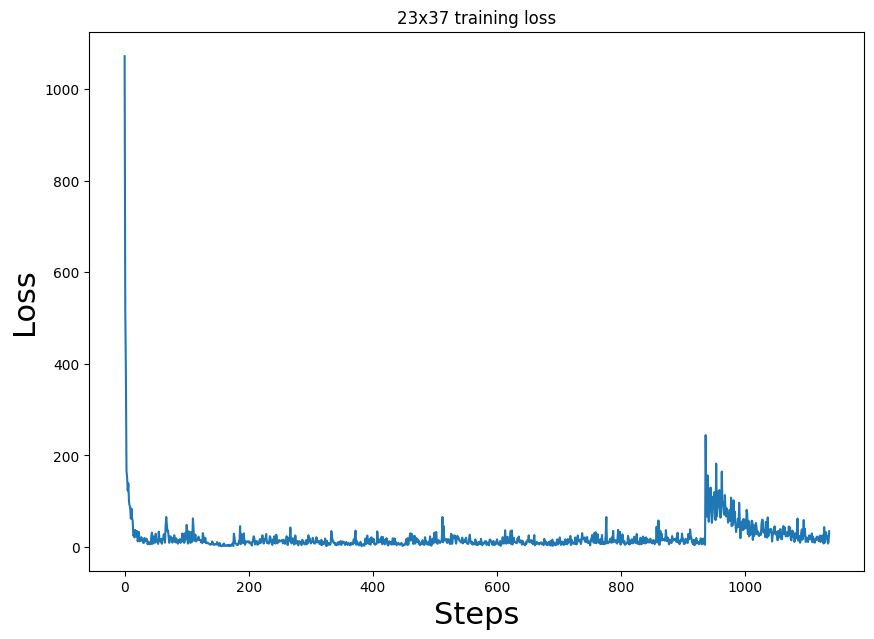

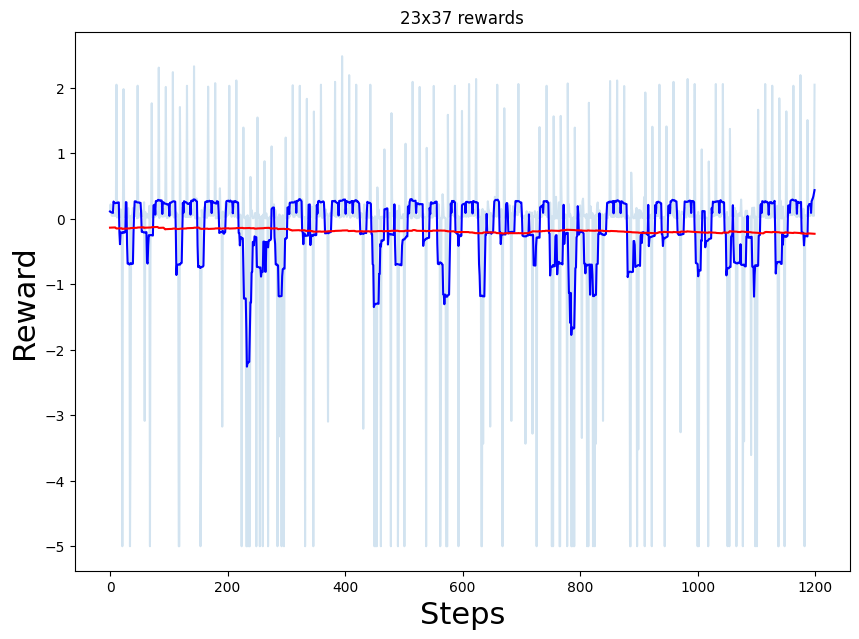

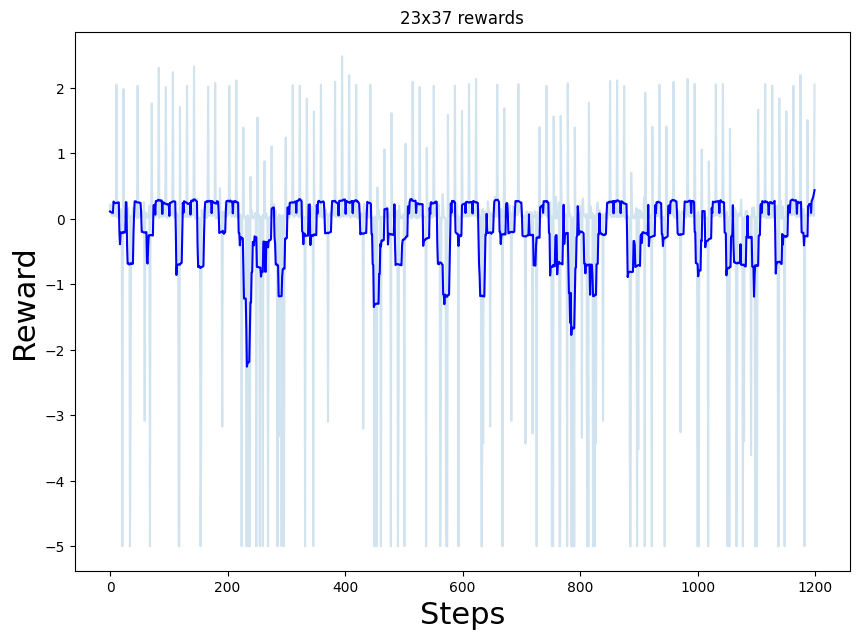

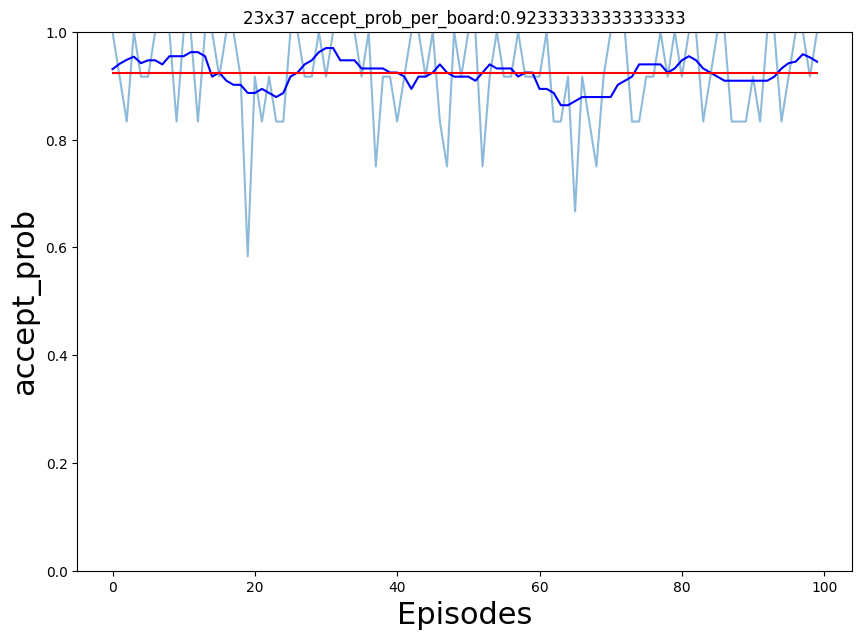

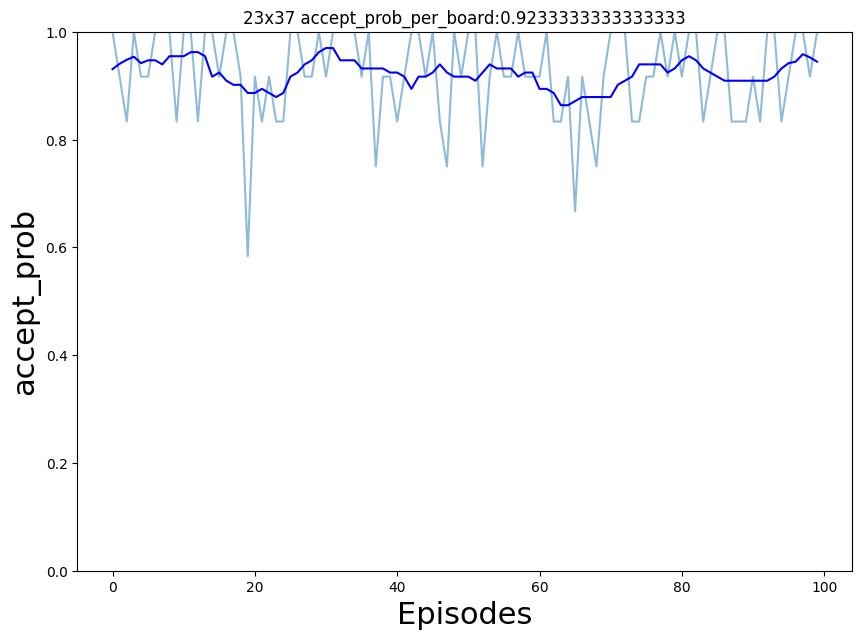

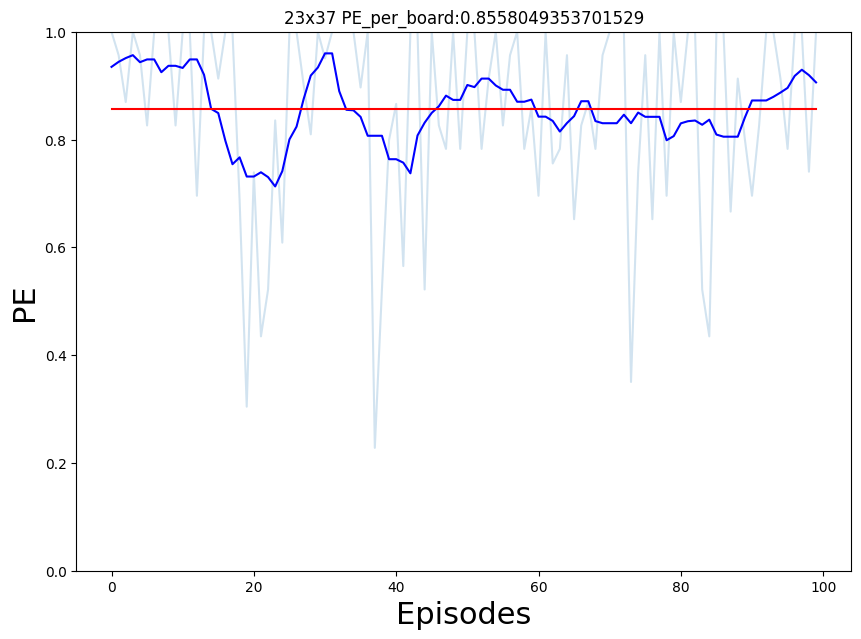

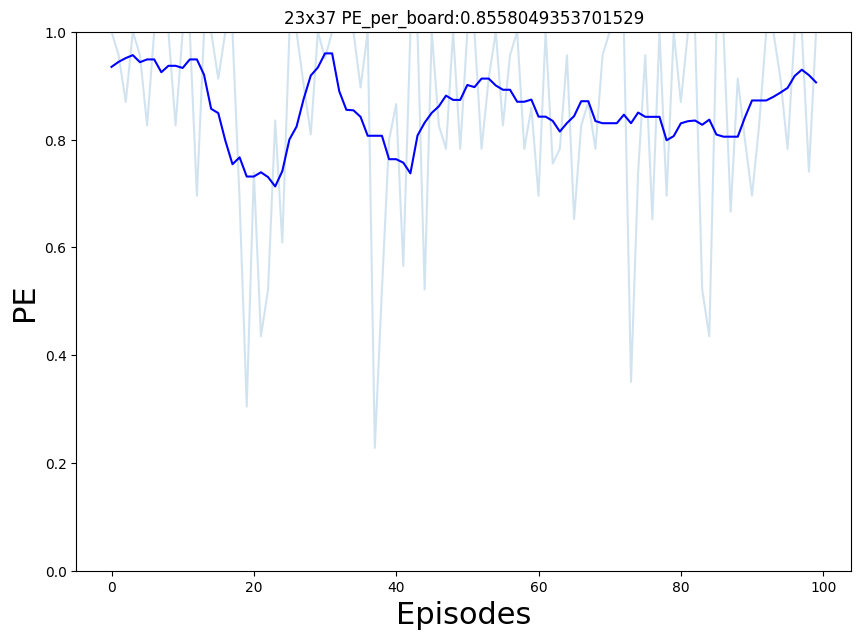

In [7]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.title(str(bin_w) + "x" + str(bin_h) + " training loss")
plt.xlabel("Steps",fontsize=22)
plt.ylabel("Loss",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_loss.png",dpi = 300)

plt.figure(figsize=(10,7))
plt.plot(rewards,alpha=0.2)
plt.plot(moving_average(rewards,5),color="blue")
plt.plot(moving_average(rewards,480),color="red")
plt.title(str(bin_w) + "x" + str(bin_h) + " rewards")
plt.xlabel("Steps",fontsize=22)
plt.ylabel("Reward",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_rewards.png",dpi = 300)

plt.figure(figsize=(10,7))
plt.plot(rewards,alpha=0.2)
plt.plot(moving_average(rewards,5),color="blue")
plt.title(str(bin_w) + "x" + str(bin_h) + " rewards")
plt.xlabel("Steps",fontsize=22)
plt.ylabel("Reward",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_rewards_no_red.png",dpi = 300)

plt.figure(figsize=(10,7))
string_accept_prob_per_board = str(bin_w) + "x" + str(bin_h) + " accept_prob_per_board:" + str(total_accept/(epochs*input_per_bin))
plt.ylim(0,1)
plt.title(string_accept_prob_per_board)
plt.plot(accept_prob_per_board,alpha=0.5)
plt.plot(moving_average(accept_prob_per_board,5),color="blue")
plt.plot(moving_average(accept_prob_per_board,480),color="red")
plt.xlabel("Episodes",fontsize=22)
plt.ylabel("accept_prob",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_accept_prob_per_board.png",dpi = 300)

plt.figure(figsize=(10,7))
string_accept_prob_per_board = str(bin_w) + "x" + str(bin_h) + " accept_prob_per_board:" + str(total_accept/(epochs*input_per_bin))
plt.ylim(0,1)
plt.title(string_accept_prob_per_board)
plt.plot(accept_prob_per_board,alpha=0.5)
plt.plot(moving_average(accept_prob_per_board,5),color="blue")
plt.xlabel("Episodes",fontsize=22)
plt.ylabel("accept_prob",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_accept_prob_per_board_no_red.png",dpi = 300)

plt.figure(figsize=(10,7))
string_PE_per_board = str(bin_w) + "x" + str(bin_h) + " PE_per_board:" + str(sum(PE_per_board)/len(PE_per_board))
plt.ylim(0,1)
plt.plot(PE_per_board,alpha = 0.2)
plt.plot(moving_average(PE_per_board,5),color="blue")
plt.plot(moving_average(PE_per_board,480),color="red")
plt.title(string_PE_per_board)
plt.xlabel("Episodes",fontsize=22)
plt.ylabel("PE",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_PE_per_board.png",dpi = 300)

plt.figure(figsize=(10,7))
string_PE_per_board = str(bin_w) + "x" + str(bin_h) + " PE_per_board:" + str(sum(PE_per_board)/len(PE_per_board))
plt.ylim(0,1)
plt.plot(PE_per_board,alpha = 0.2)
plt.plot(moving_average(PE_per_board,5),color="blue")
plt.title(string_PE_per_board)
plt.xlabel("Episodes",fontsize=22)
plt.ylabel("PE",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_10k_training_PE_per_board_no_red.png",dpi = 300)



print("total accept rate: ",total_accept/(epochs*input_per_bin))


import csv
train_loss_reward = zip(["train loss"] + losses.tolist(), ["training reward"] + rewards)
train_loss_reward = list(train_loss_reward)
np.savetxt(dir_name + date_string + "training_loss_reward.csv", train_loss_reward, delimiter =", ", fmt ='% s')


train_data = zip(["train accept rate"] + accept_prob_per_board, ["train PE"]+ PE_per_board)
train_data = list(train_data)
np.savetxt(dir_name + date_string + "training_accept_PE.csv",train_data, delimiter =", ", fmt ='% s')


In [26]:
#load model
# you need manual copy your trained model to the same place with the ipynb file
# and modify line 26 
import numpy as np
import torch
from collections import deque
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
import copy

#training setting
l1 = 2**(input_per_bin+2)
l2 = 128
l3 = 128
l4 = 2**(input_per_bin+1)


model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3, l4)
)
model_name = "Slice_DQN_n_step_model_10k_23x37_2023-08-01.pt"
model.load_state_dict(torch.load(model_name))
model.eval()

model2 = copy.deepcopy(model) #A
model2.load_state_dict(model.state_dict()) #B

loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 0
print("now model: ", model_name)

now model:  Slice_DQN_n_step_model_10k_23x37_2023-08-01.pt


In [8]:
#test bin size adjust
bin_w = 6
bin_h = 10
input_per_bin = 12


print("now test size = ",bin_w,bin_h)


now test size =  6 10


6*10100 episodes test finished.


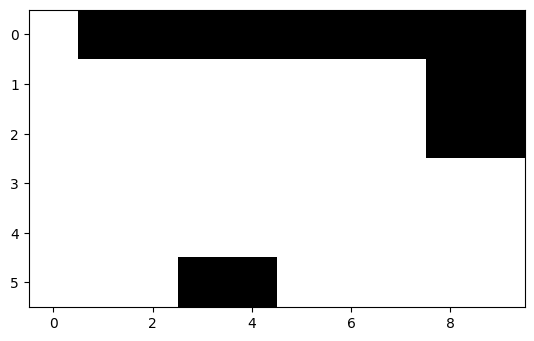

In [9]:
# target model test
from collections import deque
import random
import os
#delete output file last time
try:
    os.remove("result_test.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

try:
    os.remove("show_tree_test.txt")
except OSError as e:
    print(e)
else:
    print("File is deleted successfully")

#get all slice info
#file = open("slice_data/full_bin_" + str(bin_w) + "_" + str(bin_h) + "_100.txt",'r')
file = open("shuffle_data/full_bin_" + str(bin_w) + "_" + str(bin_h) + "_100.txt",'r')
#file = open("both_data/full_bin_" + str(bin_w) + "_" + str(bin_h) + "_600_s.txt",'r')

content = file.read()
file.close
slices = content.split('\n')
#print(slices)
if slices[-1] == "":
    print("empty")
    slices.pop()

#testing setting

test_epochs = 100
shape = (2**(input_per_bin+1),2,)
test_rewards = []
tree_imgs = []
mem_size = 1000
batch_size = 200
replay = deque(maxlen=mem_size)

h = 0
#initial state
input_count = 0
tree_tensor = torch.ones(shape) * -1
state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
state1_[0,2] = bin_w * 100 #預設寬600 高1000
state1_[0,3] = bin_h * 100

sync_freq = 500  #每500次將eval model 複製到target model
j=0         #計算500次內的第幾次
do_clear = 0
epsilon = 0
tree_count = 0
total_accept_test = 0
total_area_test = 0
PE_per_board_test = []
accept_prob_per_board_test = []
for i in range(test_epochs):    
    #if(i%48 == 0):  #clear board
    #random.shuffle(slices)
    do_clear = 0
    tree_tensor = torch.ones(shape) * -1
    state1_ = tree_tensor.reshape(1,2**(input_per_bin+2))
    state1_[0,2] = bin_w * 100 #預設寬600 高1000
    state1_[0,3] = bin_h * 100
    status = 1
    input_count = 0
    total_area_test = 0
    accepted_count = 0
    while(status == 1): #1 board
      #set state        
      new_slice = slices[input_per_bin*i+input_count].split()
      width = new_slice[0]
      height = new_slice[1]
      state1_[0,0] = float(width)
      state1_[0,1] = float(height)
      input_count += 1
      
      #find valid place
      valid_place = []
      valid_place_count = 0
      

      for node in range(1,2**(input_per_bin)):          
        if state1_[:,node*2] > 0 and state1_[:,node*2+1] > 0:
          if(state1_[:,node*4] == -1 and state1_[:,node*4+1] == -1  #left undefined
            and state1_[:,node*4+2] == -1 and state1_[:,node*4+3] == -1 #right undefined
            and state1_[:,node*2] >= state1_[0,0] and state1_[:,node*2+1] >= state1_[0,1]): #space enough
            valid_place.append(node)
            valid_place_count += 1
            

     
      j+=1
        
      qval = model(state1_.float())
      qval_ = qval.data.numpy()
      

      #select action
      if valid_place_count != 0:
        if(accepted_count == 0):
          action_ = 1 #root
          with open("result_test.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i*12+input_count+1))
            f.write(" start:")
            f.write(str(action_))
            f.write(" ")
        elif (random.random() < epsilon): #F
          #R random choose one in valid place
          action_ = valid_place[np.random.randint(0,valid_place_count)]
          with open("result_test.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i*12+input_count+1))
            f.write(" R:\t")
            f.write(str(action_))
            f.write(" ")        
        else:
          #Q:choose max Q in valid place
          valid_Q = []
          for choice in range(valid_place_count):
            valid_Q.append(qval_[0,valid_place[choice]])
          max_Q = max(valid_Q)
          #print(max_Q)
          #print(valid_Q.index(max_Q))
          #print(valid_place[valid_Q.index(max_Q)])
          action_ = valid_place[valid_Q.index(max_Q)]

          with open("result_test.txt", 'a') as f:
            f.write("epoch:")
            f.write(str(i+1))
            f.write(" Q:\t")
            f.write(str(action_))
            f.write(" ")

        
    

      with open("result_test.txt", 'a') as f:
        f.write(str(width))
        f.write("x")
        f.write(str(height))
        f.write("\n")
      
    
      if valid_place_count != 0:
        accepted_count += 1
        total_accept_test += 1
        total_area_test = total_area_test + float(width)*float(height)
        deploy_slice(action_, float(width), float(height))

      with open("show_tree_test.txt", 'a') as f:
          f.write("test episode: ")
          f.write(str(i+1))
          f.write(" step: ")
          f.write(str(input_count))
          f.write(" width,height: ")
          f.write(str(width))
          f.write(",")
          f.write(str(height))
          
          f.write(str(valid_place))
          f.write(" action: ")
          f.write(str(action_))
          f.write("\n")
      show_tree_file()

      this_tree_img = tree_to_img()
      tree_imgs.append(this_tree_img)

      if input_count == input_per_bin:
        accept_prob_per_board_test.append(accepted_count/input_per_bin)
        PE_per_board_test.append(total_area_test/(bin_w*bin_h*10000))
        status = 0 #one board done, exit while and clear board

        #this_tree_img = tree_to_img()
        #tree_imgs.append(this_tree_img)

        
        with open("result_test.txt", 'a') as f:
          f.write("clear\n")

      
      print("episode:",i)
      clear_output(wait=True)
    if epsilon > 0.1:
      epsilon -= (1/test_epochs)
        
print(str(bin_w) + "*" + str(bin_h) + " " + str(test_epochs) + " episodes test finished.")

#A Set the update frequency for synchronizing the target model parameters to the main DQN
#B Use the target network to get the maiximum Q-value for the next state
#C Copy the main model parameters to the target network
#print("total accept rate: ",total_accept/(100*12))


total accept rate:  0.8883333333333333
average PE:  0.7298333333333332


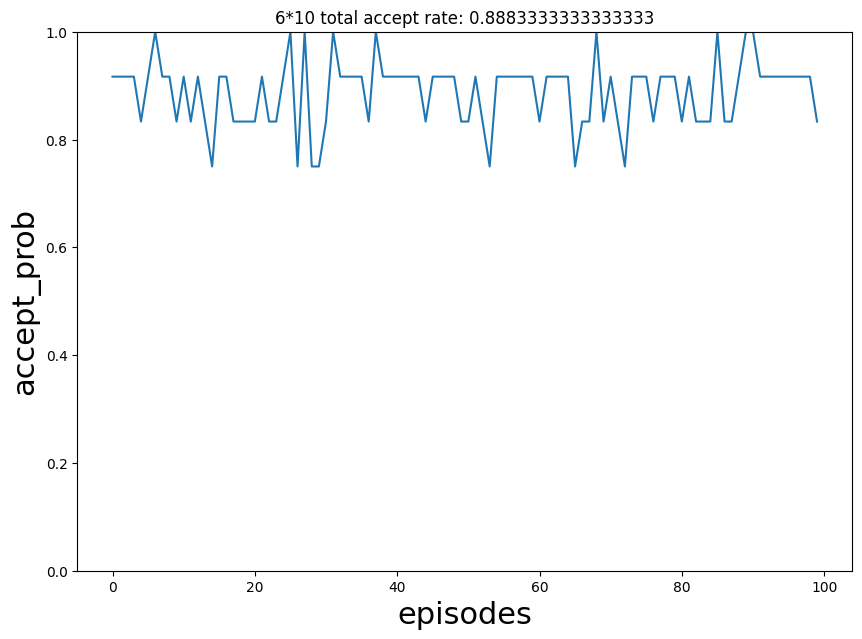

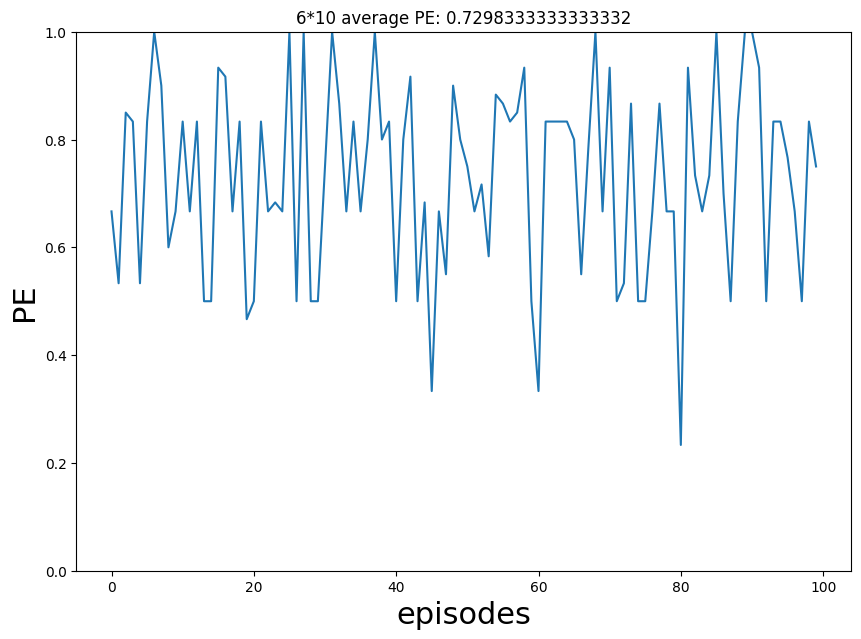

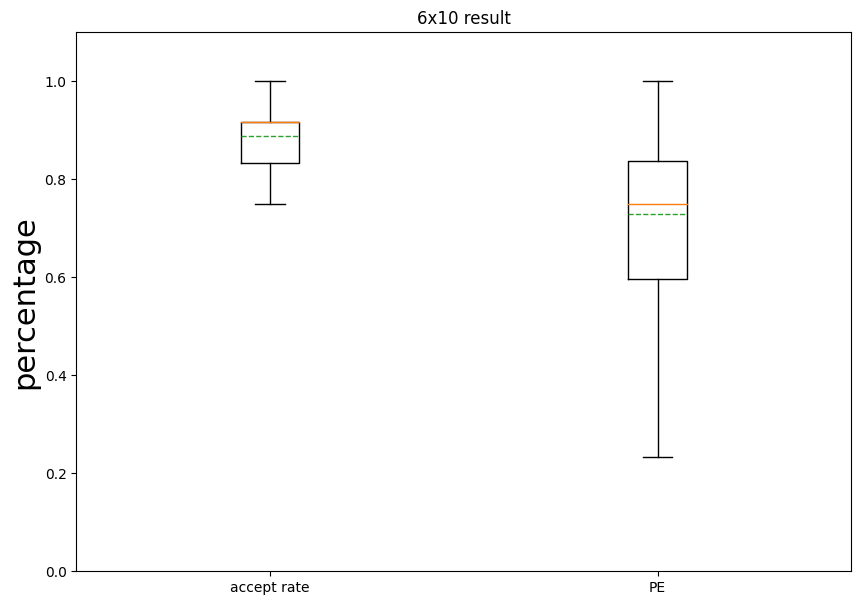

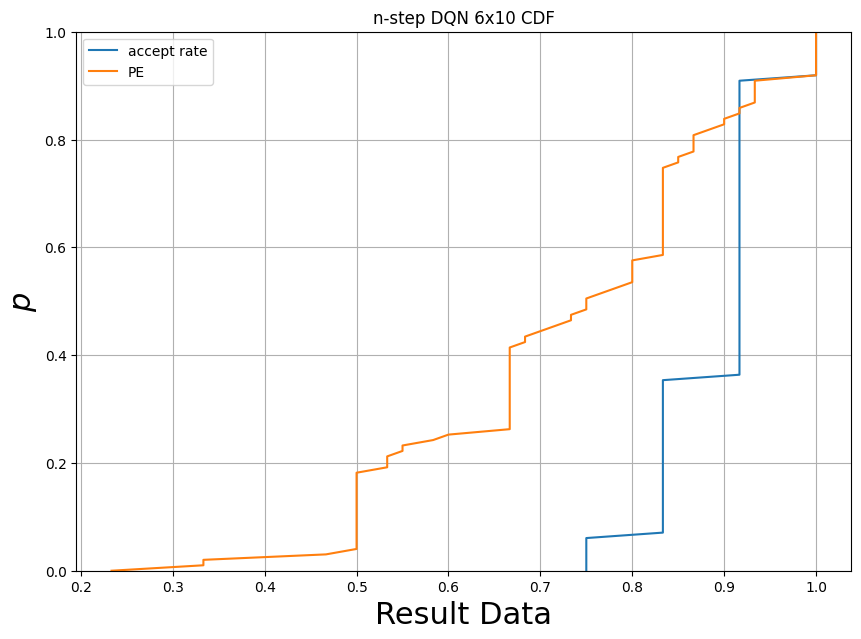

In [10]:
string_accept_prob_per_board_test = str(bin_w) + "*" + str(bin_h) + " total accept rate: " + str(total_accept_test/(len(accept_prob_per_board_test)*input_per_bin))
string_PE_per_board_test = str(bin_w) + "*" + str(bin_h) + " average PE: " +str(sum(PE_per_board_test) / len(PE_per_board_test))

#accept rate plot
plt.figure(figsize=(10,7))
plt.ylim(0,1)
plt.plot(accept_prob_per_board_test)
plt.title(string_accept_prob_per_board_test)
plt.xlabel("episodes",fontsize=22)
plt.ylabel("accept_prob",fontsize=22) 
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_" + str(test_epochs) + "_test_accept_prob_per_board.png",dpi=300)

#PE plot
plt.figure(figsize=(10,7))
plt.ylim(0,1)
plt.title(string_PE_per_board_test)
plt.plot(PE_per_board_test)
plt.xlabel("episodes",fontsize=22)
plt.ylabel("PE",fontsize=22)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_" + str(test_epochs) + "_test_PE_per_board.png",dpi=300)

#box plot
plt.figure(figsize=(10,7))
plt.ylim(0,1.1)
x_labels = "accept rate","PE"
plt.boxplot([accept_prob_per_board_test,PE_per_board_test], labels = x_labels, showfliers=True,showmeans = True, meanline = True)
plt.title(str(bin_w) + "x" + str(bin_h) + " result")
plt.ylabel("percentage",fontsize=22) 
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_" + str(test_epochs) + "_test_box.png",dpi=300)

#CDF plot
sorted_accept_prob_per_board_test = copy.deepcopy(accept_prob_per_board_test)
sorted_accept_prob_per_board_test.sort() #sort small to big
p1 = 1. * np.arange(len(sorted_accept_prob_per_board_test)) / (len(sorted_accept_prob_per_board_test) - 1) # calculate the proportional values of samples
sorted_PE_per_board_test = copy.deepcopy(PE_per_board_test)
sorted_PE_per_board_test.sort()
p2 = 1. * np.arange(len(sorted_PE_per_board_test)) / (len(sorted_PE_per_board_test) - 1)

plt.figure(figsize=(10,7))
plt.ylim(0,1)
plt.title("n-step DQN " + str(bin_w) + "x" + str(bin_h) + " CDF")
plt.plot(sorted_accept_prob_per_board_test, p1)
plt.plot(sorted_PE_per_board_test, p2)
plt.legend(['accept rate','PE']) #mark line's name
plt.xlabel("Result Data", fontsize=22)
plt.ylabel("$p$", fontsize=22)
plt.grid(True)
plt.savefig(dir_name + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_" + str(test_epochs) + "_test_CDF.png",dpi=300)


print("total accept rate: ",total_accept_test/(len(accept_prob_per_board_test)*input_per_bin))
print("average PE: ",sum(PE_per_board_test) / len(PE_per_board_test))

import csv
#save data to csv
test_data = zip(["test accept rate"] + accept_prob_per_board_test , ["test PE"] + PE_per_board_test)
test_data = list(test_data)
np.savetxt(dir_name + date_string + "_" + str(test_epochs) + "_test_" + str(bin_w) + "x" + str(bin_h) + ".csv",test_data, delimiter =", ", fmt ='% s')

FileNotFoundError: [Errno 2] No such file or directory: './2023-08-15_result/img/2023-08-15_6x10_0_0.png'

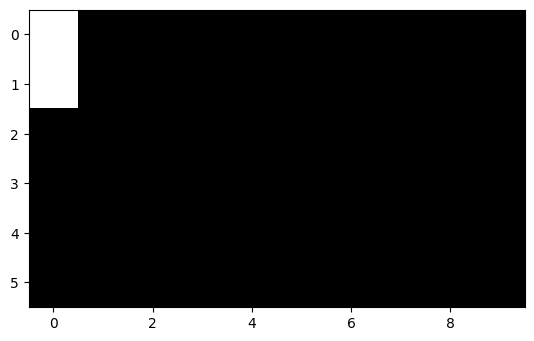

In [11]:
# manually create img dirtory, 0 means the 0th bin result, 12 means input count
# use https://ezgif.com/maker/ezgif-5-e79c9342-gif
for img_count in range(12):
    plt.imshow(tree_imgs[0*12+img_count],cmap='gray')
    plt.savefig(dir_name + "img/" + date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_0_"+str(img_count)+".png",dpi=300)

In [45]:
# string_accept_prob_per_board_test = str(bin_w) + "*" + str(bin_h) + " total accept rate: " + str(total_accept_test/(test_epochs*input_per_bin))
# string_PE_per_board_test = str(bin_w) + "*" + str(bin_h) + " average PE: " +str(sum(PE_per_board_test) / len(PE_per_board_test))


# plt.figure(figsize=(10,7))
# plt.ylim(0,1.1)
# x_labels = "accept rate","PE"
# plt.boxplot([accept_prob_per_board_test,PE_per_board_test], labels = x_labels, showfliers=True,showmeans = True, meanline = True)
# plt.title("compare")
# plt.ylabel("accept_prob",fontsize=22) 
# plt.savefig(date_string + "_" + str(bin_w) + "x" + str(bin_h) + "_test_accept_prob_per_board_box.png",dpi=300)

In [46]:
# import csv
# print(torch.seed())
# #print(accept_prob_per_board_test)



# train_data = zip(["training reward"]+rewards,["train accept rate"] + accept_prob_per_board, ["train PE"]+ PE_per_board)
# train_data = list(train_data)
# #print(train_data)
# np.savetxt("train.csv",train_data, delimiter =", ", fmt ='% s')


# test_data = zip(["test accept rate"] + accept_prob_per_board_test , ["test PE"] + PE_per_board_test)
# test_data = list(test_data)
# print(test_data)
# np.savetxt("test.csv",test_data, delimiter =", ", fmt ='% s')

In [47]:
# plt.imshow(tree_imgs[12],cmap='gray')